**Data import**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import calendar
from datetime import datetime

%matplotlib inline

In [2]:
# Importing and merging the files
joined_files = os.path.join("/content/drive/MyDrive/Dane z aplikacji/Garmin Connect/Kroki/Data_2021", "*.csv")

In [3]:
# A list of all joined files
joined_list = glob.glob(joined_files)

# First version of the dataframe
steps = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

#Variables
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

**Data check**

In [4]:
# Checking the dimensions of the dataframe
steps.shape

(371, 3)

In [5]:
# Samples from dataframe
steps.sample(10)

,Unnamed: 0,Bieżąca,Cel
243,11 maj,15555,9220
306,9 mar,12553,9220
361,11 sty,8241,9220
275,3 kwi,15696,9220
54,16 lis,2410,9220
255,25 kwi,6717,9220
289,20 mar,13223,9220
218,28 maj,5091,9220
174,21 lip,2804,9220
366,2 sty,9564,9220


In [6]:
# Checking the types of data
steps.dtypes

Unnamed: 0    object
Bieżąca        int64
Cel            int64
dtype: object

**Data cleaning**

In [7]:
# Deleting the last column in the dataframe
steps2 = steps.iloc[: , :-1]
steps2.columns

Index(['Unnamed: 0', 'Bieżąca'], dtype='object')

In [8]:
# Renaming the column names
steps2.rename(columns = {'Unnamed: 0':'Date','Bieżąca':'Steps'}, inplace = True)
steps2.head()

,Date,Steps
0,30 gru,3887
1,31 gru,2762
2,1 sty,4006
3,2 sty,10672
4,3 sty,3986


In [9]:
# Converting the Date column into string
# Splitting the Date column into Day, Month and Year
# Filling 0 where needed in the Day column

steps2['Date'] = steps2['Date'].astype('str')
steps2['Date'] = steps2['Date'].str.strip()
new = steps2["Date"].str.split(" ", n = 1, expand = True)
steps2["Day"]= new[0]
steps2["Month"]= new[1]
steps2["Year"]= '2021'

n = 2
steps2['Day'] = steps2['Day'].str.zfill(n)
steps2.head()

,Date,Steps,Day,Month,Year
0,30 gru,3887,30,gru,2021
1,31 gru,2762,31,gru,2021
2,1 sty,4006,01,sty,2021
3,2 sty,10672,02,sty,2021
4,3 sty,3986,03,sty,2021


In [10]:
# Replacing polish shortcuts of months names into appropriate numbers
steps2['Month'] = steps2['Month'].replace(['sty', 'lut', 'mar', 'kwi', 'maj', 'cze', 'lip', 'sie', 'wrz', 'paź', 'lis','gru'],['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
steps2.head()

,Date,Steps,Day,Month,Year
0,30 gru,3887,30,12,2021
1,31 gru,2762,31,12,2021
2,1 sty,4006,01,01,2021
3,2 sty,10672,02,01,2021
4,3 sty,3986,03,01,2021


In [11]:
# Concatenating three columns (Day, Month, Year) into one (New_date)
steps2['New_date'] = steps2['Year'] + '-' + steps2['Month'] + '-' + steps2['Day']
#pd.to_datetime(steps2['New_date'])
steps2.head()

,Date,Steps,Day,Month,Year,New_date
0,30 gru,3887,30,12,2021,2021-12-30
1,31 gru,2762,31,12,2021,2021-12-31
2,1 sty,4006,01,01,2021,2021-01-01
3,2 sty,10672,02,01,2021,2021-01-02
4,3 sty,3986,03,01,2021,2021-01-03


In [12]:
# Checking for duplicated dates
steps3 = steps2[steps2.duplicated(['New_date'], keep=False)]

In [13]:
# Sorting dataframe by New_date column values
steps2 = steps2.sort_values(by="New_date")
steps2.head()

,Date,Steps,Day,Month,Year,New_date
2,1 sty,4006,01,01,2021,2021-01-01
365,1 sty,4285,01,01,2021,2021-01-01
366,2 sty,9564,02,01,2021,2021-01-02
3,2 sty,10672,02,01,2021,2021-01-02
4,3 sty,3986,03,01,2021,2021-01-03


In [14]:
# Deleting inappropriate data which were selected manually from steps3 dataframe
steps4 = steps2.drop([2,3,4,5,6,364])

In [15]:
# Changing type of New_data column
steps4['New_date'] = [datetime.strptime(x,"%Y-%m-%d") for x in steps4['New_date']]

In [16]:
# Creating new columns: Weekday and Month
# Reseting the index
steps4['Weekday'] = steps4['New_date'].dt.day_name()
steps4['Month'] = steps4['New_date'].dt.month_name()
steps4.reset_index(inplace=True)
steps4.head(372)

,index,Date,Steps,Day,Month,Year,New_date,Weekday
0,365,1 sty,4285,01,January,2021,2021-01-01,Friday
1,366,2 sty,9564,02,January,2021,2021-01-02,Saturday
2,367,3 sty,5039,03,January,2021,2021-01-03,Sunday
3,368,4 sty,16538,04,January,2021,2021-01-04,Monday
4,369,5 sty,17392,05,January,2021,2021-01-05,Tuesday
...,...,...,...,...,...,...,...,...
360,11,27 gru,15470,27,December,2021,2021-12-27,Monday
361,12,28 gru,5617,28,December,2021,2021-12-28,Tuesday
362,13,29 gru,12020,29,December,2021,2021-12-29,Wednesday
363,0,30 gru,3887,30,December,2021,2021-12-30,Thursday


In [17]:
# Assigning seasons to dates
winter_1 = (steps4['New_date'] >= '2021-01-01') & (steps4['New_date'] <= '2021-03-20')
winter_2 = (steps4['New_date'] >= '2021-12-21')
spring = (steps4['New_date'] >= '2021-03-21') & (steps4['New_date'] <= '2021-06-21')
summer = (steps4['New_date'] >= '2021-06-22') & (steps4['New_date'] <= '2021-09-22')
autumn = (steps4['New_date'] >= '2021-09-23') & (steps4['New_date'] <= '2021-12-21')

steps4.loc[winter_1,'Season'] ='Winter'
steps4.loc[winter_2,'Season'] ='Winter'
steps4.loc[spring,'Season'] ='Spring'
steps4.loc[summer,'Season'] ='Summer'
steps4.loc[autumn,'Season'] ='Autumn'

steps4.head(365)

,index,Date,Steps,Day,Month,Year,New_date,Weekday,Season
0,365,1 sty,4285,01,January,2021,2021-01-01,Friday,Winter
1,366,2 sty,9564,02,January,2021,2021-01-02,Saturday,Winter
2,367,3 sty,5039,03,January,2021,2021-01-03,Sunday,Winter
3,368,4 sty,16538,04,January,2021,2021-01-04,Monday,Winter
4,369,5 sty,17392,05,January,2021,2021-01-05,Tuesday,Winter
...,...,...,...,...,...,...,...,...,...
360,11,27 gru,15470,27,December,2021,2021-12-27,Monday,Winter
361,12,28 gru,5617,28,December,2021,2021-12-28,Tuesday,Winter
362,13,29 gru,12020,29,December,2021,2021-12-29,Wednesday,Winter
363,0,30 gru,3887,30,December,2021,2021-12-30,Thursday,Winter


In [18]:
# Reordering the columns
df = steps4[['New_date', 'Month', 'Weekday','Season','Steps']]
df.head()

,New_date,Month,Weekday,Season,Steps
0,2021-01-01,January,Friday,Winter,4285
1,2021-01-02,January,Saturday,Winter,9564
2,2021-01-03,January,Sunday,Winter,5039
3,2021-01-04,January,Monday,Winter,16538
4,2021-01-05,January,Tuesday,Winter,17392


In [19]:
# Checking if the length of dataframe is appropriate 
n = 365 
if n-len(df) == 0:
  print ("Valid number of days")
else:
  print ("Invalid number of days")

Valid number of days


In [21]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/Outputs/Steps_2021.csv')

**DATA ANALYSIS**

In [22]:
# Annual statistics (sum, mean, max, min) and the calculation of goal achievement
x = df["Steps"]

x1 = str(x.sum())
x2 = str(round(x.mean()))
x3 = str(x.max())
x4 = str(x.min())

goal = df['Steps']> 10000
goal = df[goal]
res = len(goal.index)
x5 = "{:.0%}".format(res/365)

print(
"In 2021 I did:\n\n" + x1 + 
" - total steps,\n" + x2 + 
" - average,\n" + x3 + 
" - max in a day,\n" + x4 + 
" - min in a day.\n\nMoreover I had " + 
str(res) + ' days when the goal of 10 000 steps per day was achieved and it constitutes ' + 
x5 +'.')

In 2021 I did:

3645664 - total steps,
9988 - average,
51131 - max in a day,
1689 - min in a day.

Moreover I had 150 days when the goal of 10 000 steps per day was achieved and it constitutes 41%.


In [23]:
# Monthly statistics (sum, mean, max, min)
new_order_m = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthAggregated = df.groupby('Month').agg({'Steps': 'sum'}).astype(int).reset_index()
monthAggregated.rename(columns = {'Steps':'Sum'}, inplace = True)

mean = df.groupby('Month').agg({'Steps': 'mean'}).reset_index()
monthAggregated['Mean'] = mean['Steps'].astype(int)

max = df.groupby('Month').agg({'Steps': 'max'}).reset_index()
monthAggregated['Max'] = max['Steps']

min = df.groupby('Month').agg({'Steps': 'min'}).reset_index()
monthAggregated['Min'] = min['Steps']

monthAggregated

,Month,Sum,Mean,Max,Min
0,April,260011,8667,19919,3074
1,August,343762,11089,28419,2628
2,December,255560,8243,17678,1689
3,February,300665,10738,24742,3546
4,January,298176,9618,17449,2697
5,July,285193,9199,27976,1965
6,June,484724,16157,44898,3421
7,March,320511,10339,19197,2472
8,May,294917,9513,19940,2166
9,November,213444,7114,14272,2410


In [24]:
# Average steps per season
new_order_s = ['Spring','Summer','Autumn', 'Winter']
seasonAggregated = df.groupby('Season').agg({'Steps': 'mean'}).reset_index()
seasonAggregated['Steps'] = seasonAggregated['Steps'].astype(int)
seasonAggregated

,Season,Steps
0,Autumn,8186
1,Spring,10762
2,Summer,10764
3,Winter,10189


In [25]:
# Average steps per day of the week
new_order_w = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

weekdayAggregated = df.groupby('Weekday').agg({'Steps': 'mean'}).reset_index()
weekdayAggregated['Steps'] = weekdayAggregated['Steps'].astype(int)
weekdayAggregated

,Weekday,Steps
0,Friday,8685
1,Monday,8856
2,Saturday,13067
3,Sunday,11648
4,Thursday,9252
5,Tuesday,9636
6,Wednesday,8795


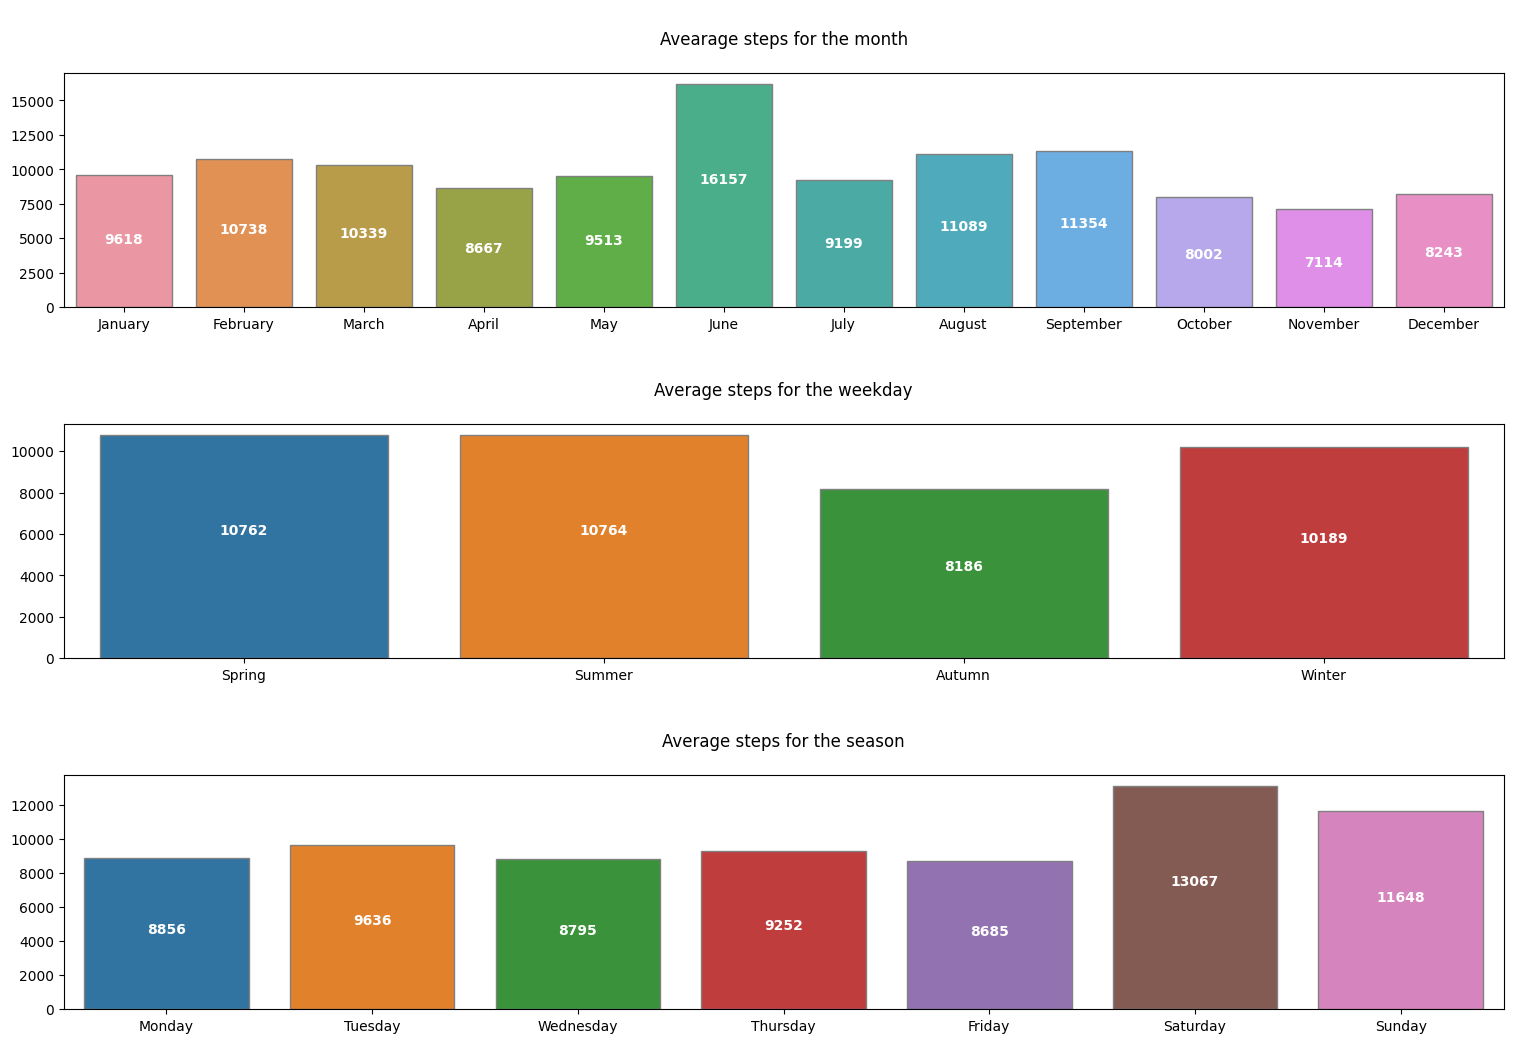

In [26]:
# The Seaborn barplots with average steps per month, day of the week and season
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,12)


sns.set_style('darkgrid')
sns.barplot(data = monthAggregated, x= 'Month', y = 'Mean', ax= ax1, order=new_order_m, edgecolor = 'grey')
sns.barplot(data = seasonAggregated, x= 'Season', y = 'Steps', ax= ax2, order=new_order_s, edgecolor = 'grey')
sns.barplot(data = weekdayAggregated, x= 'Weekday', y = 'Steps', ax= ax3, order=new_order_w, edgecolor = 'grey')
sns.set_context(rc = {'patch.linewidth': 0.0})


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.4, hspace=0.5)


ax1.title.set_text('\n'+'Avearage steps for the month' + '\n')
ax2.title.set_text('\n'+'Average steps for the weekday' + '\n')
ax3.title.set_text('\n'+'Average steps for the season' + '\n')



ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 1.5), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white', weight='semibold')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 1.5), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white', weight='semibold')
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() / 1.5), ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points', color='white', weight='semibold')

In [ ]:
# Additional modules installing
try:
  import calmap
  import july
except:
  ! pip install calmap
  ! pip install july
  import calmap
  import july

/usr/local/lib/python3.9/dist-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/usr/local/lib/python3.9/dist-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]


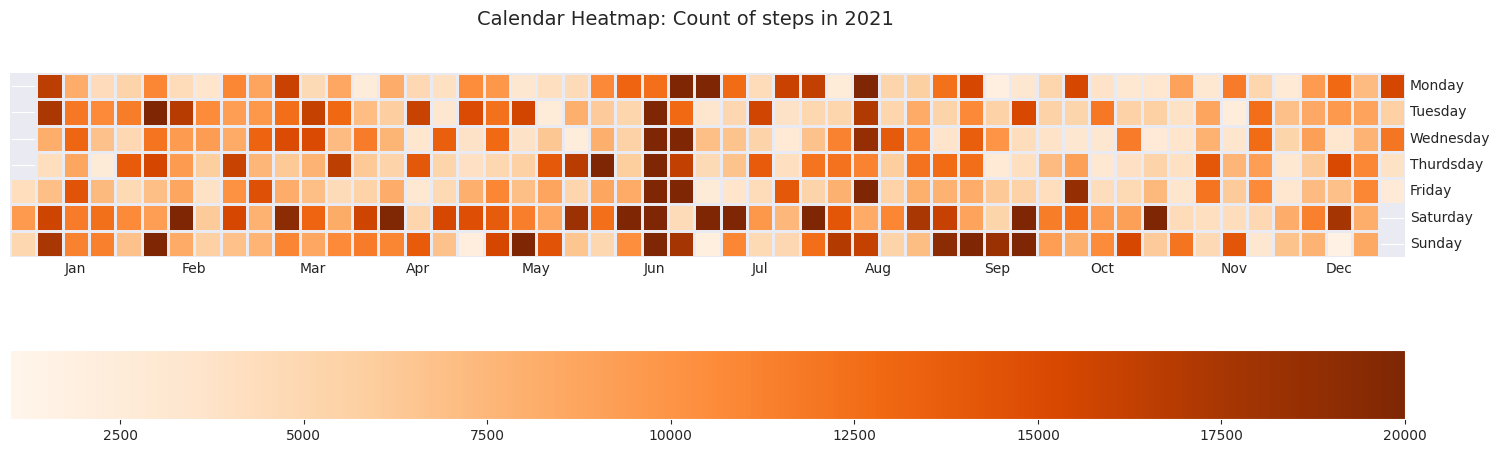

In [30]:
# The calendar heatmap using Calmap module
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)

df.index = pd.to_datetime(df['New_date'])

events = df["Steps"]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thurdsday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cax = calmap.yearplot(events, 
                      year=2021, 
                      ax=ax, 
                      cmap='Oranges',
                      vmin = '1000',
                      vmax = '20000',
                      daylabels = days
                      )
fig.suptitle('Calendar Heatmap: Count of steps in 2021',fontsize=14, y=0.65)
fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal')

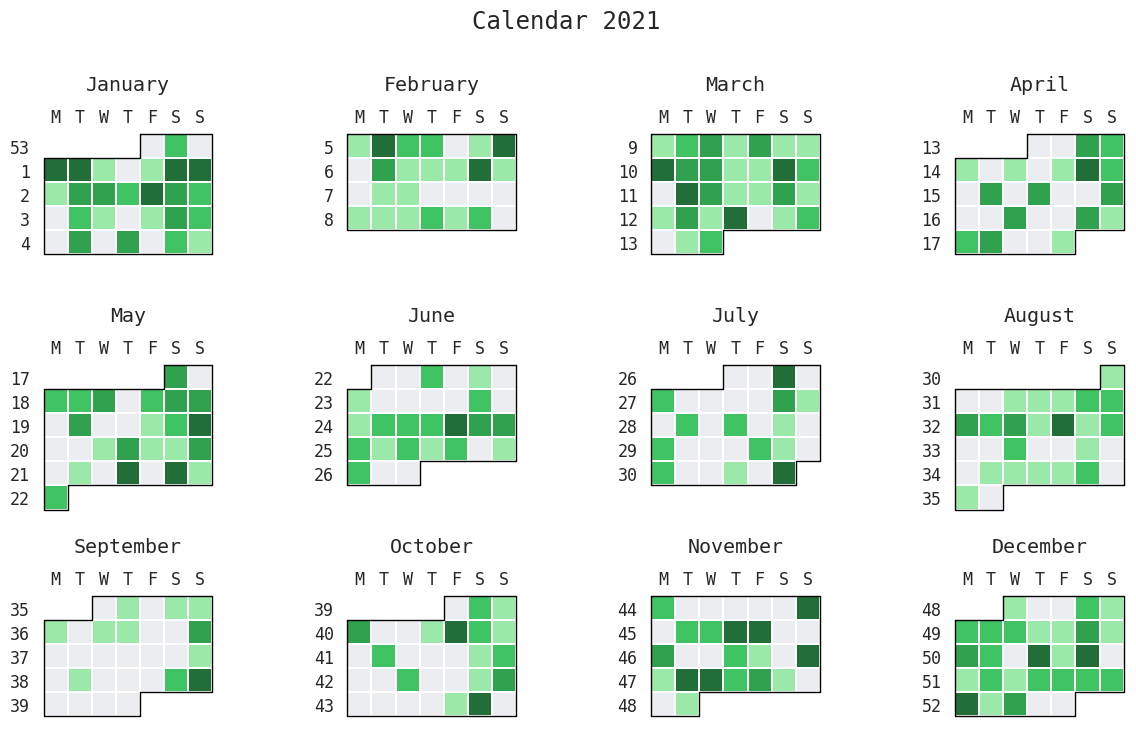

In [37]:
# The calendar heatmap using July module (I)
cax_2 = july.calendar_plot(df['New_date'], df['Steps'], cmap = 'github')

<Axes: title={'center': 'June'}>

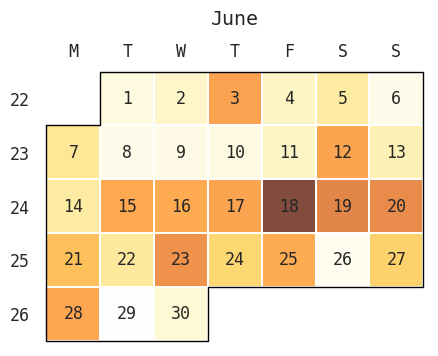

In [38]:
# The calendar heatmap using July module (II)
# Insight into the month with highest average of steps per month
july.month_plot(df['New_date'], df['Steps'], cmap = 'golden', month = 6, date_label=True)